# Part 1


**Problem: Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?**

Import libraries:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


Import 311 NYC dataset:

In [3]:
#https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
path = 'fhrw-4uyv.csv'

#import only for relevant columns
columns_used = ['unique_key', 'created_date', 'complaint_type', 'incident_zip', 'incident_address', 'street_name', 'address_type', 'city', 'resolution_description', 'borough', 'latitude', 'longitude', 'closed_date', 'location_type']

#total number of rows as 10 million
df_311 = pd.read_csv(path, parse_dates = ['created_date'], usecols = columns_used, nrows=10000000) 
df_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type
0,2020-10-25 12:36:48,47979046,WATER LEAK,10468.0,2715 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.869648,-73.902030,NaN,RESIDENTIAL BUILDING
1,2020-10-25 15:56:03,47979693,HEAT/HOT WATER,11422.0,148-56 262 PLACE,262 PLACE,ADDRESS,Rosedale,The following complaint conditions are still o...,QUEENS,40.653249,-73.725543,NaN,RESIDENTIAL BUILDING
2,2020-10-25 02:06:31,47977676,HEAT/HOT WATER,10028.0,221 EAST 83 STREET,EAST 83 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.776599,-73.954748,NaN,RESIDENTIAL BUILDING
3,2020-10-25 16:47:11,47979139,HEAT/HOT WATER,11213.0,1689 CARROLL STREET,CARROLL STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.666077,-73.930341,NaN,RESIDENTIAL BUILDING
4,2020-10-25 10:21:45,47978127,HEAT/HOT WATER,11213.0,930 PROSPECT PLACE,PROSPECT PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.674070,-73.945831,NaN,RESIDENTIAL BUILDING


Check data type:

In [4]:
df_311.dtypes

created_date              datetime64[ns]
unique_key                         int64
complaint_type                    object
incident_zip                     float64
incident_address                  object
street_name                       object
address_type                      object
city                              object
resolution_description            object
borough                           object
latitude                         float64
longitude                        float64
closed_date                       object
location_type                     object
dtype: object

Check missing values:

In [5]:
missing_data_311= df_311.isnull()
missing_data_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
for column in missing_data_311.columns.values.tolist():
    print(column)
    print (missing_data_311[column].value_counts())
    print("") 

created_date
False    6243862
Name: created_date, dtype: int64

unique_key
False    6243862
Name: unique_key, dtype: int64

complaint_type
False    6243862
Name: complaint_type, dtype: int64

incident_zip
False    6163108
True       80754
Name: incident_zip, dtype: int64

incident_address
False    6191031
True       52831
Name: incident_address, dtype: int64

street_name
False    6191031
True       52831
Name: street_name, dtype: int64

address_type
False    6159110
True       84752
Name: address_type, dtype: int64

city
False    6163536
True       80326
Name: city, dtype: int64

resolution_description
False    6236042
True        7820
Name: resolution_description, dtype: int64

borough
False    6243862
Name: borough, dtype: int64

latitude
False    3413317
True     2830545
Name: latitude, dtype: int64

longitude
False    3413317
True     2830545
Name: longitude, dtype: int64

closed_date
False    6107640
True      136222
Name: closed_date, dtype: int64

location_type
False    6191032


No missing values for 'complaint_type'.
Let's plot amount of complains per type:

Text(0, 0.5, 'Type of Complaints')

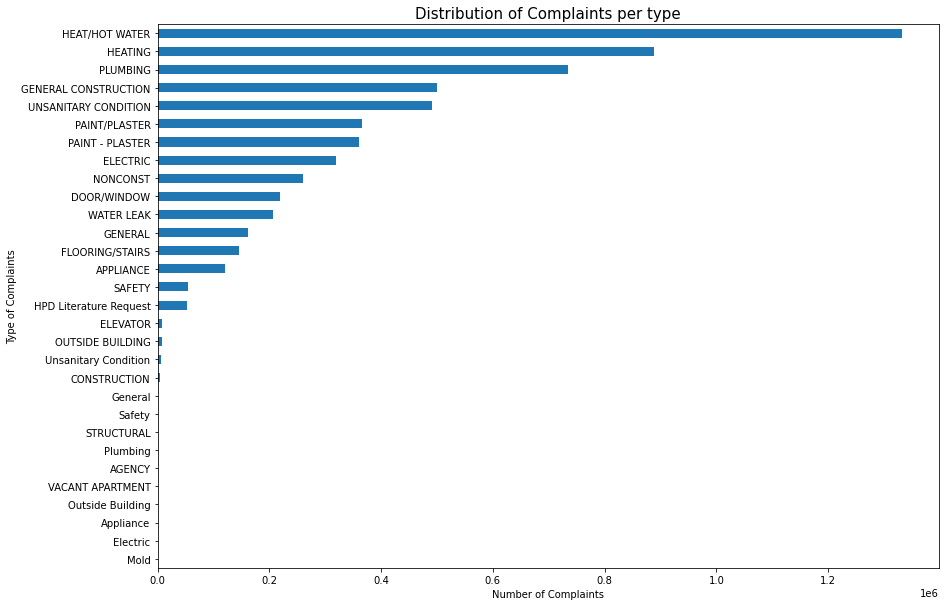

In [20]:
df_311_complaint_type = df_311['complaint_type'].value_counts()
df_311_complaint_type.sort_values(ascending = True, inplace =True)
total_complaint = df_311_complaint_type.sum()

df_311_complaint_type.plot(kind='barh', figsize=(14, 10))

#uncomment in case you want to see percentages
#for index, value in enumerate(df_311_complaint_type): 
    #label = '{}%'.format(round((value/total_complaint)*100, 2)) 
    #plt.annotate(label, xy = (value - 70000, index- 0.17), color = 'white')

plt.title('Distribution of Complaints per type', size=15)
plt.xlabel('Number of Complaints')
plt.ylabel('Type of Complaints')


## Conclusion

The **Heat/Hot Water** is the one with the **biggest amount of complaints**. Therefore the *Department of Housing Preservation* and *Development of New York City* should focus on fixing this problem first.